In [85]:
import gradio as gr
from sklearn.neural_network import MLPClassifier
import torchvision.datasets as datasets
import seaborn as sns
import numpy as np

#dark mode seaborn 
sns.set_style("darkgrid")

In [86]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)


In [87]:
print(mnist_trainset.data.shape)
print(mnist_testset.data.shape)
print(mnist_trainset.targets.shape)
print(mnist_testset.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([60000])
torch.Size([10000])


In [88]:
x_train = mnist_trainset.data
y_train = mnist_trainset.targets
x_test = mnist_testset.data
y_test = mnist_testset.targets

In [89]:
x_train = x_train.numpy()
x_test = x_test.numpy()
y_train = y_train.numpy()
y_test = y_test.numpy()

In [84]:
#reshape and normalize the data
x_train_reshape = x_train.reshape(60000, 784)/255
x_test_reshape = x_test.reshape(10000, 784)/255

In [92]:
#train the model
mlp = MLPClassifier(hidden_layer_sizes=(32, 32))
mlp.fit(x_train_reshape, y_train)

MLPClassifier(hidden_layer_sizes=(32, 32))

In [93]:
#print the accuracy
print("Training Accuracy: ", mlp.score(x_train_reshape, y_train))
print("Testing Accuracy: ", mlp.score(x_test_reshape, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9681


<Axes: >

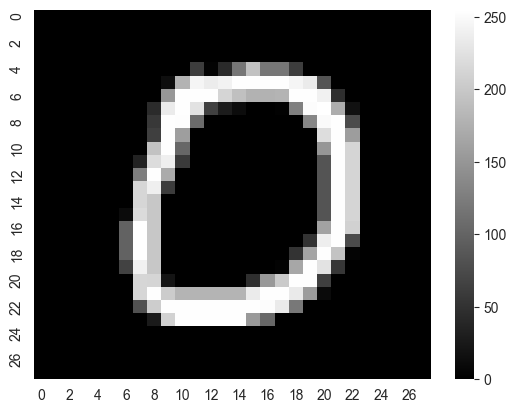

In [123]:
#plot the first image
sns.heatmap(x_test[10], cmap='gray')

In [124]:
def predict_image(img):
    img = img.reshape(1, 784)/255.0
    prediction = mlp.predict(img)[0]
    return int(prediction)

print(predict_image(x_test[10]))

0
